<a href="https://colab.research.google.com/github/SarkarPriyanshu/DataScienceAssign/blob/main/Healthcare_Dataset_Using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d prasad22/healthcare-dataset

Saving kaggle.json to kaggle.json
  0% 0.00/483k [00:00<?, ?B/s]
100% 483k/483k [00:00<00:00, 106MB/s]


In [2]:
import zipfile
import os

for file in os.listdir():
    if file.endswith("healthcare-dataset.zip"):
        with zipfile.ZipFile(file, "r") as zip_file:
            zip_file.extractall()


In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")

# Basic Analysis

In [4]:
dtypes = {'Test Results': 'category', 'Medication': 'category', 'Admission Type': 'category'}
parse_dates = ['Date of Admission', 'Discharge Date']
df = pd.read_csv('/content/healthcare_dataset.csv', parse_dates=parse_dates, dtype=dtypes)

In [5]:
df.shape

(10000, 15)

In [6]:
df.sample(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
8731,John Jackson,21,Male,O+,Cancer,2020-12-13,Nicholas Page,Watson Ltd,Medicare,4096.629047,180,Elective,2021-01-11,Penicillin,Inconclusive
7389,Christopher Page,38,Female,AB-,Asthma,2021-02-23,Tonya Arnold,"Franklin, Parker and Tapia",Blue Cross,41175.749488,365,Elective,2021-03-12,Lipitor,Inconclusive
8367,Tracy Dalton,27,Male,AB+,Cancer,2019-06-26,Robert Pratt,"Coleman, Robinson and Garcia",Cigna,29317.026183,410,Elective,2019-07-05,Ibuprofen,Inconclusive
2679,Elizabeth Robinson,35,Male,O+,Hypertension,2023-05-16,David Parrish,Paul-Russell,Medicare,49886.805181,164,Elective,2023-06-08,Penicillin,Normal
77,Lisa Johnson,32,Male,B-,Diabetes,2020-08-24,Denise Jones,Jackson-Bauer,Medicare,9029.126291,263,Emergency,2020-09-05,Ibuprofen,Normal


In [7]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                10000 non-null  object        
 1   Age                 10000 non-null  int64         
 2   Gender              10000 non-null  object        
 3   Blood Type          10000 non-null  object        
 4   Medical Condition   10000 non-null  object        
 5   Date of Admission   10000 non-null  datetime64[ns]
 6   Doctor              10000 non-null  object        
 7   Hospital            10000 non-null  object        
 8   Insurance Provider  10000 non-null  object        
 9   Billing Amount      10000 non-null  float64       
 10  Room Number         10000 non-null  int64         
 11  Admission Type      10000 non-null  category      
 12  Discharge Date      10000 non-null  datetime64[ns]
 13  Medication          10000 non-null  category   

In [8]:
df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Name,10000,9378,Michael Johnson,7,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,NaT,NaT,51.4522,19.588974,18.0,35.0,52.0,68.0,85.0
Gender,10000,2,Female,5075,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood Type,10000,8,AB-,1275,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medical Condition,10000,6,Asthma,1708,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Admission,10000,1815,2019-04-12 00:00:00,15,2018-10-30,2023-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Doctor,10000,9416,Michael Johnson,7,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hospital,10000,8639,Smith PLC,19,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Insurance Provider,10000,5,Cigna,2040,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Billing Amount,10000.0,NaN,NaN,NaN,NaT,NaT,25516.806778,14067.292709,1000.180837,13506.523967,25258.112566,37733.913727,49995.902283


In [9]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [10]:
df.duplicated().sum()

0

# EDA

- Is there any siginifcant relation between Age and Billing Amount feature with Target column ?

In [11]:
eda_df = df.drop(['Name','Hospital','Doctor','Room Number'],axis=1)

In [12]:
eda_df.sample(5)

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
8569,27,Male,O+,Arthritis,2023-07-26,Cigna,48989.697122,Elective,2023-08-12,Penicillin,Abnormal
8824,51,Male,AB+,Cancer,2022-10-25,Aetna,45240.426672,Elective,2022-11-24,Ibuprofen,Inconclusive
7972,22,Female,B-,Hypertension,2019-04-14,Aetna,29635.768638,Emergency,2019-04-18,Penicillin,Inconclusive
8504,18,Male,O+,Arthritis,2023-06-24,Blue Cross,17202.772937,Elective,2023-07-19,Paracetamol,Inconclusive
3549,66,Male,A-,Diabetes,2023-06-16,Cigna,18929.743530,Emergency,2023-07-05,Paracetamol,Inconclusive


In [13]:
print(f'What are the average age of patiences : {eda_df["Age"].mean()}')
print(f'What are the median age of patiences : {eda_df["Age"].median()}')

What are the average age of patiences : 51.4522
What are the median age of patiences : 52.0


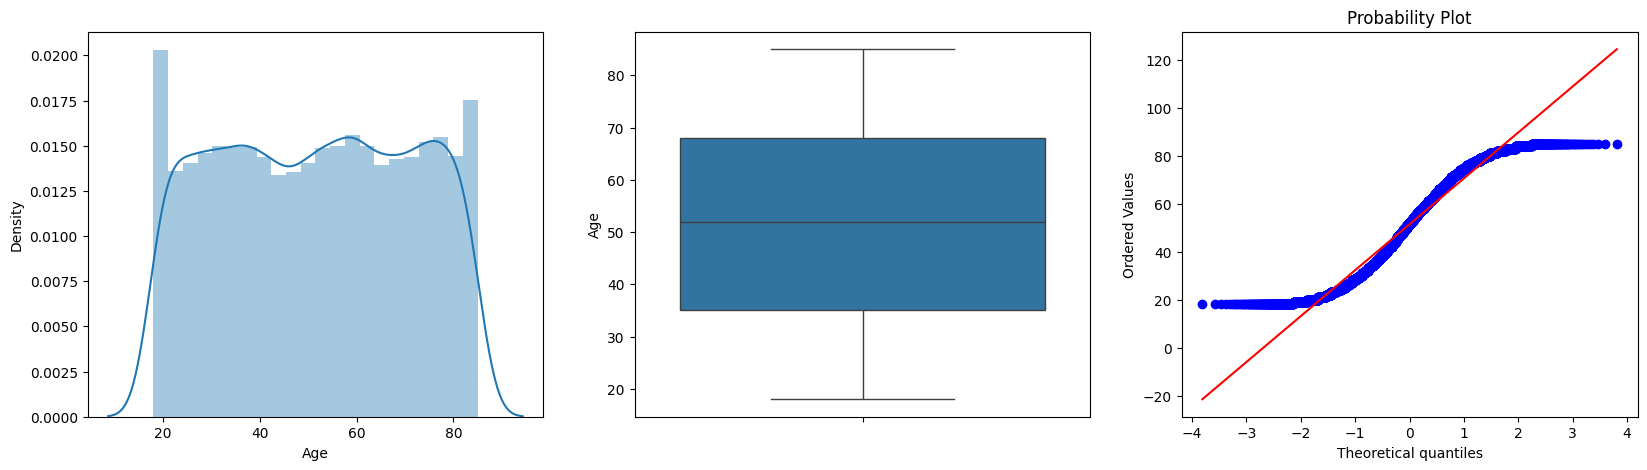

In [14]:
fig,ax = plt.subplots(1,3,figsize=(20,5))

sns.distplot(eda_df['Age'],ax=ax[0])
sns.boxplot(eda_df['Age'],ax=ax[1])
stats.probplot(eda_df['Age'],plot=ax[2])

plt.show()

In [15]:
eda_df \
.groupby(['Test Results']) \
.agg({'Age':['mean','median','max','min','std','var','count']}) \
.reset_index() \
.style.background_gradient(cmap ='coolwarm')

In [16]:
print(f'What are the average Billing Amount of patiences : {eda_df["Billing Amount"].mean()}')
print(f'What are the median Billing Amount of patiences : {eda_df["Billing Amount"].median()}')

What are the average Billing Amount of patiences : 25516.8067777384
What are the median Billing Amount of patiences : 25258.112566373504


**Age Feature Observations**

  ***Can we draw conclusion from age column?***

  - Age columns distribution is uniform
  - No outliers
  - When we compare the Age feature with Target column (Test Results) we says that the central tendancy and distribution of Normal patients are high that means we have very wide range of patients in Normal category
  - Least amount of age group belong to Inconclusive Test result type

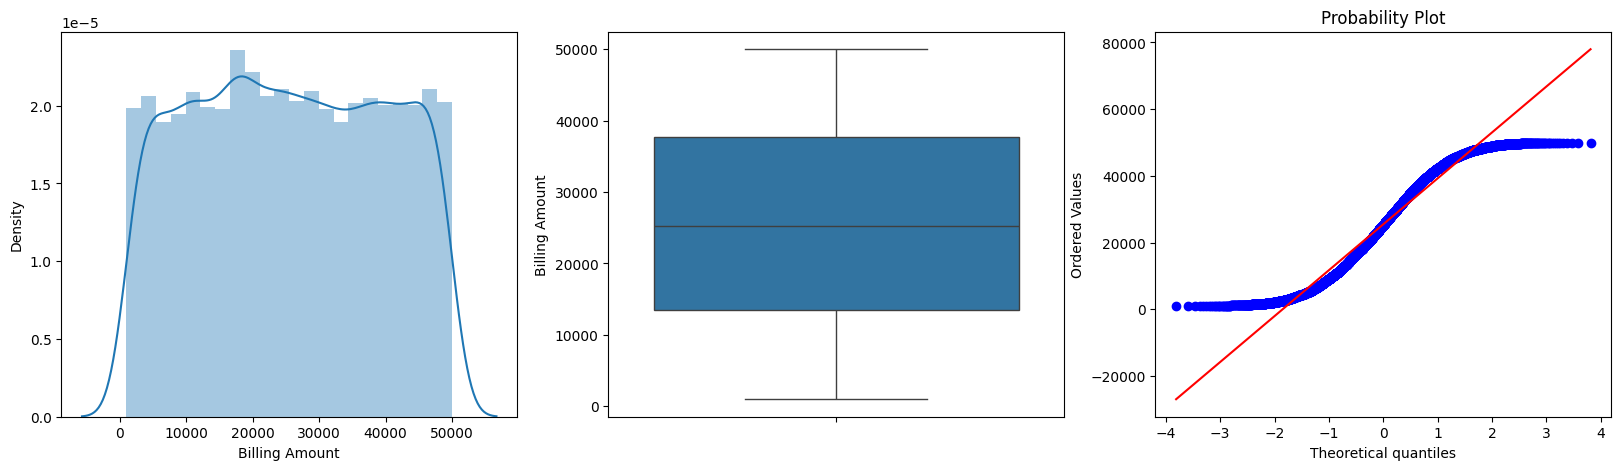

In [17]:
fig,ax = plt.subplots(1,3,figsize=(20,5))

sns.distplot(eda_df['Billing Amount'],ax=ax[0])
sns.boxplot(eda_df['Billing Amount'],ax=ax[1])
stats.probplot(eda_df['Billing Amount'],plot=ax[2])

plt.show()

In [18]:
eda_df \
.groupby(['Test Results']) \
.agg({'Billing Amount':['mean','median','max','min','std','var','count']}) \
.reset_index() \
.style.background_gradient(cmap ='coolwarm', axis=0)



**Billing Amount Feature Observations**

  ***Can we draw conclusion from Billing Amount column?***

  - Billing Amount columns distribution is uniform
  - No outliers
  - When we compare the Age feature with Target column (Test Results) we says that the central tendancy and distribution of Inconclusive patients are high that means we have very wide range of patients in Inconclusive category (Means when we compare the Billing amount in terms of Test Result its found that people who Inconclusive test result have higher billing amount range)
  - Least amount of age group belong to Normal Test result type

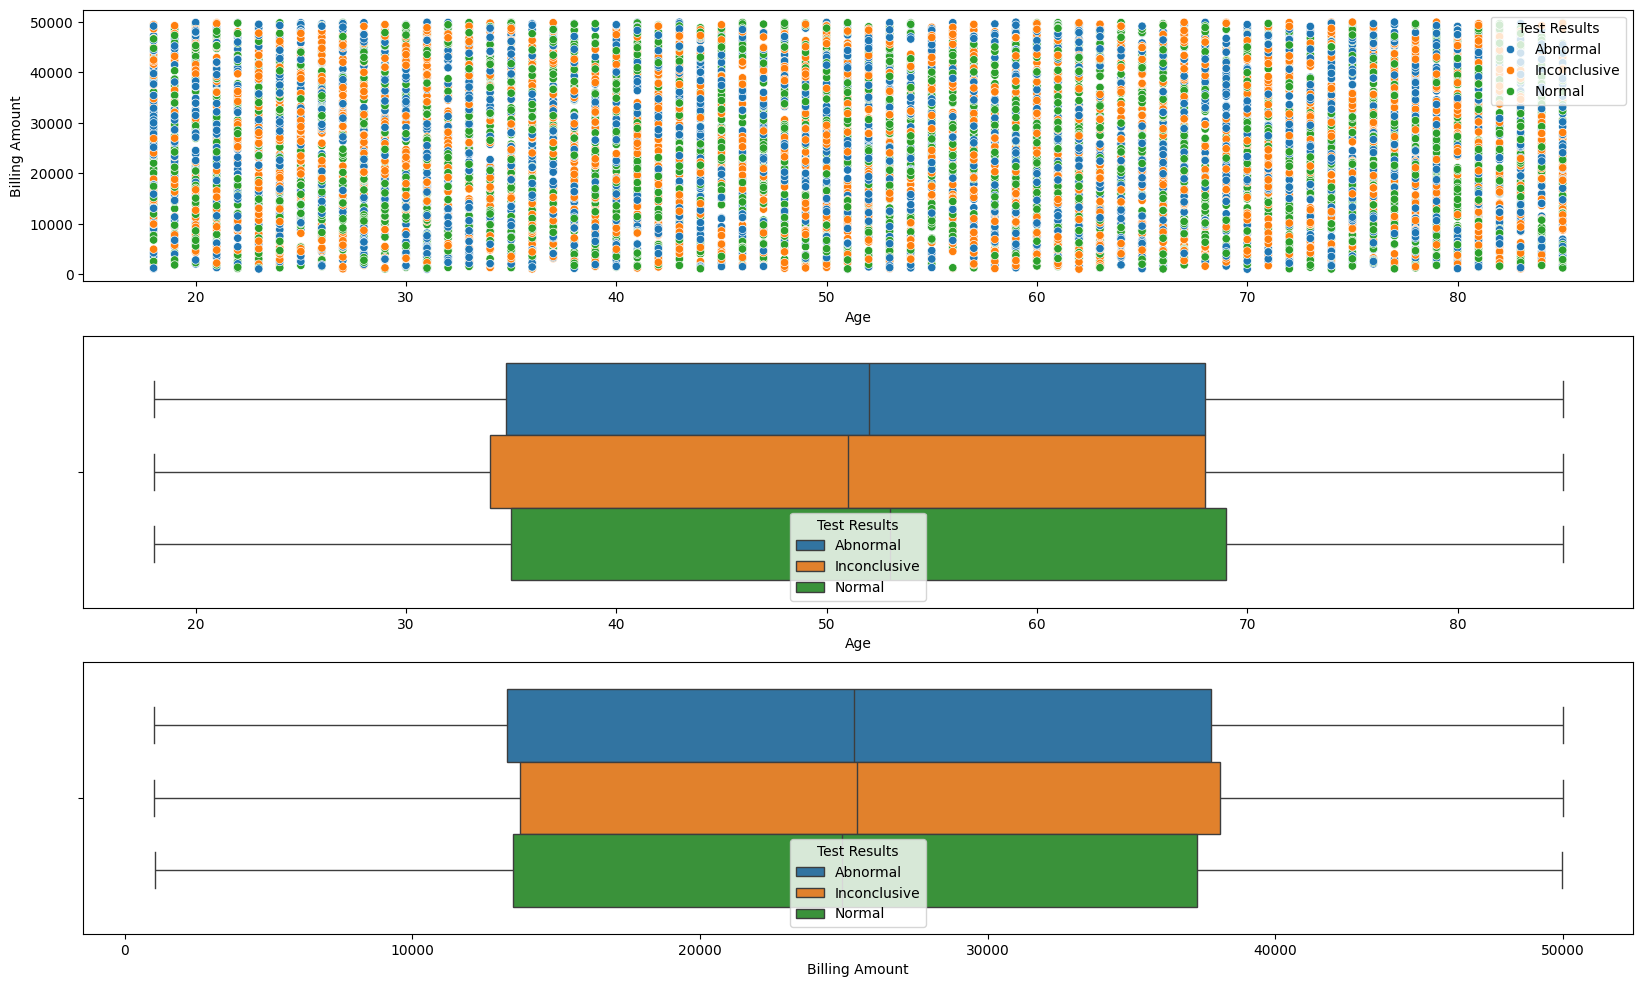

In [87]:


fig,ax = plt.subplots(3,1,figsize=(20,12))

sns.scatterplot(data=eda_df,x='Age',y='Billing Amount',hue='Test Results',ax=ax[0])
sns.boxplot(data=eda_df,x='Age',hue='Test Results',ax=ax[1])
sns.boxplot(data=eda_df,x='Billing Amount',hue='Test Results',ax=ax[2])

plt.show()



**Observations**

  ***Is there any relation between Billing Amount and Age columns?***

  - There is not pattern or relation between Billing Amount and Age.

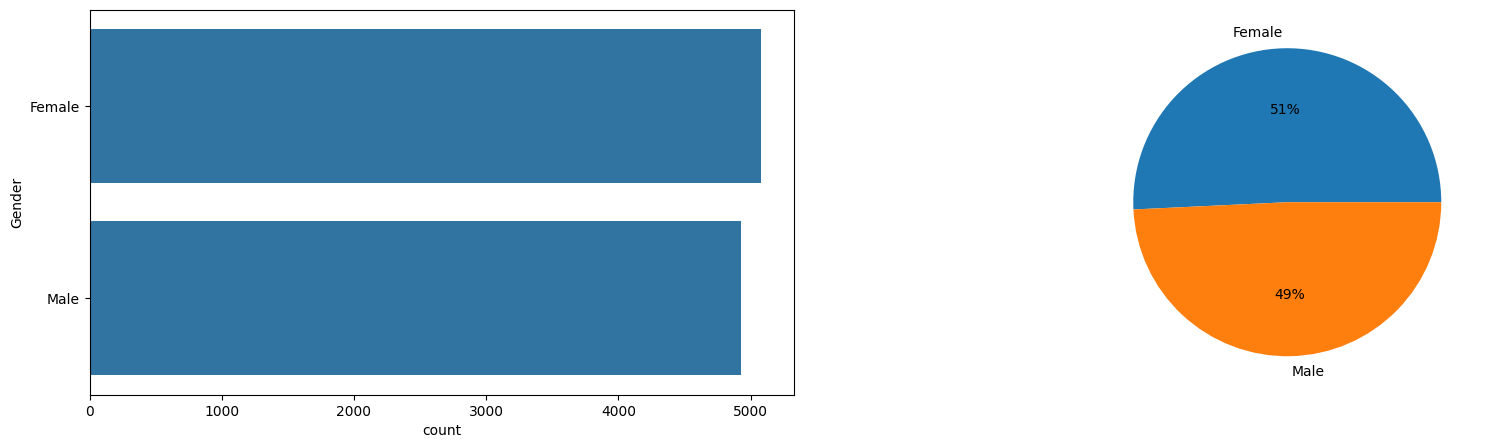

In [19]:
fig,ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(eda_df['Gender'],ax=ax[0])
value,label = eda_df['Gender'].value_counts().values,eda_df['Gender'].value_counts().index

ax[1].pie(value, labels=label, autopct='%.0f%%')

plt.show()

In [20]:
eda_df \
.groupby(['Test Results', 'Gender']) \
.agg({'Gender': 'count'}) \
.rename(columns={'Gender':'count'}) \
.reset_index() \
.sort_values(['Test Results','count'],ascending=[True,False]) \
.style.background_gradient(cmap ='coolwarm', axis=0)

,Test Results,Gender,count
1,Abnormal,Male,1740
0,Abnormal,Female,1716
2,Inconclusive,Female,1696
3,Inconclusive,Male,1581
4,Normal,Female,1663
5,Normal,Male,1604


In [145]:
def ShowCategoricalAssociations(feature=None):
  contingency_table = pd.crosstab(y_train,X_train[feature])

  chi_stats, pvalue = chi2_contingency(contingency_table)[0],chi2_contingency(contingency_table)[1]
  num_obs = contingency_table.sum().sum()
  cramers_v = np.sqrt(chi_stats / (num_obs * (min(contingency_table.shape) - 1)))
  print(f'cramers_v : {cramers_v}\nP value : {pvalue}')

In [146]:
ShowCategoricalAssociations('Gender')

cramers_v : 0.007118661591586408
P value : 0.8374751394231681




**Gender Feature Observations**

  ***Can we draw conclusion from Gender column?***

  - Gender columns is balanced within its category
  - When we compare the Gender feature with Target column (Test Results) we saw that Gender wise Male patients from Abnomal Result type have highest count
  - Where as Abnormal patients are the highest count in our samples
  - Least amount of age group belong to Normal Test result type

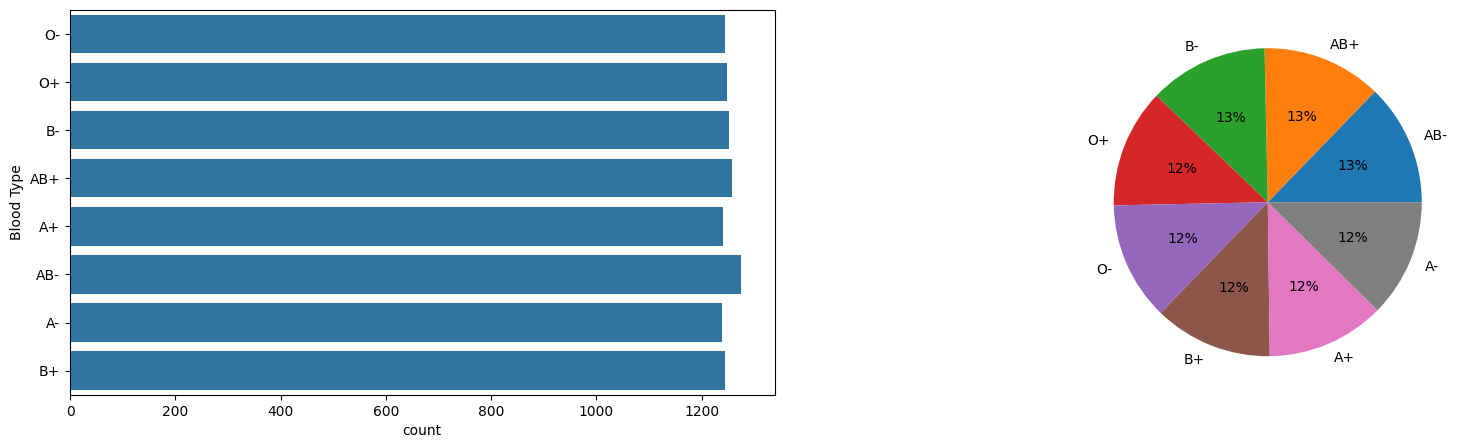

In [21]:
fig,ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(eda_df['Blood Type'],ax=ax[0])
value,label = eda_df['Blood Type'].value_counts().values,eda_df['Blood Type'].value_counts().index

ax[1].pie(value, labels=label, autopct='%.0f%%')

plt.show()

In [22]:
eda_df \
.groupby(['Test Results', 'Blood Type']) \
.agg({'Blood Type': 'count'}) \
.rename(columns={'Blood Type':'count'}) \
.reset_index() \
.sort_values(['Test Results','count'],ascending=[True,False]) \
.style.background_gradient(cmap ='coolwarm', axis=0)

,Test Results,Blood Type,count
5,Abnormal,B-,456
3,Abnormal,AB-,449
1,Abnormal,A-,437
2,Abnormal,AB+,432
7,Abnormal,O-,432
4,Abnormal,B+,422
6,Abnormal,O+,417
0,Abnormal,A+,411
10,Inconclusive,AB+,427
14,Inconclusive,O+,427


In [147]:
ShowCategoricalAssociations('Blood Type')

cramers_v : 0.023863178196017118
P value : 0.890763206148378




**Blood Type Feature Observations**

  ***Can we draw conclusion from Blood Type column?***

  - Blood Type columns is balanced within its category
  - When we compare the Blood Type feature with Target column (Test Results)we found the following.
    - When Result was Abnormal Blood Group of B-, AB-, A- Patients have the highest count
    - When Result was Inconclusive Blood Group of AB+, O-, AB- Patients have the highest count
    - When Result was Normal Blood Group of A+, O-, A- Patients have the highest count

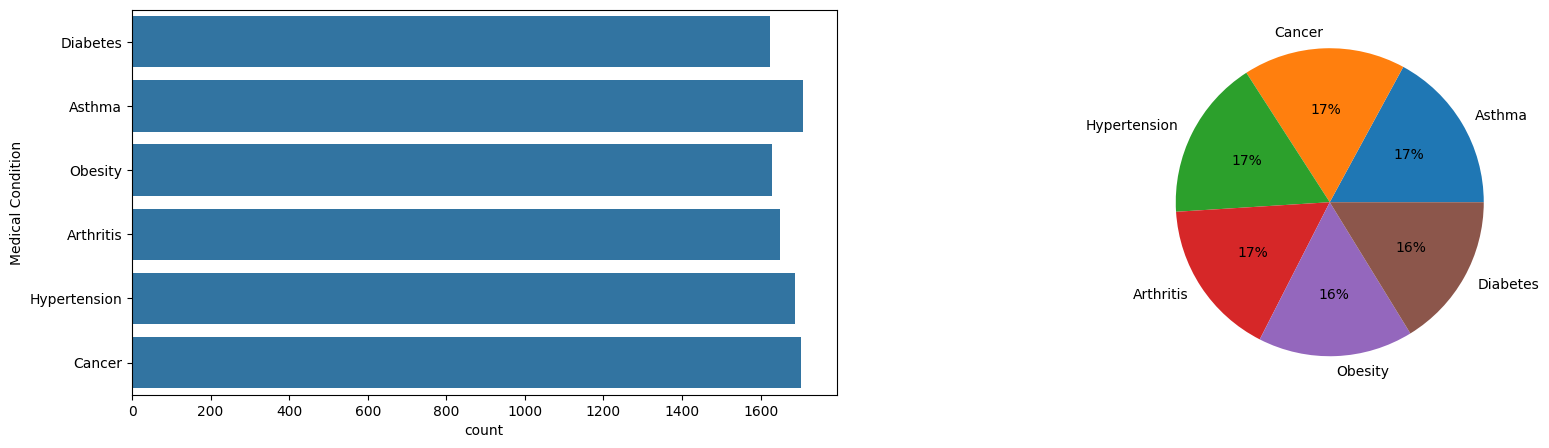

In [23]:
fig,ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(eda_df['Medical Condition'],ax=ax[0])
value,label = eda_df['Medical Condition'].value_counts().values,eda_df['Medical Condition'].value_counts().index

ax[1].pie(value, labels=label, autopct='%.0f%%')

plt.show()

In [24]:
eda_df \
.groupby(['Test Results', 'Medical Condition']) \
.agg({'Medical Condition': 'count'}) \
.rename(columns={'Medical Condition':'count'}) \
.reset_index() \
.sort_values(['Test Results','count'],ascending=[True,False]) \
.style.background_gradient(cmap ='coolwarm', axis=0)

,Test Results,Medical Condition,count
1,Abnormal,Asthma,623
4,Abnormal,Hypertension,602
2,Abnormal,Cancer,577
5,Abnormal,Obesity,562
0,Abnormal,Arthritis,555
3,Abnormal,Diabetes,537
8,Inconclusive,Cancer,556
10,Inconclusive,Hypertension,554
6,Inconclusive,Arthritis,553
7,Inconclusive,Asthma,551


In [148]:
ShowCategoricalAssociations('Medical Condition')

cramers_v : 0.025287626581056342
P value : 0.5366176796626234




**Medical Condition Feature Observations**

  ***Can we draw conclusion from Medical Condition column?***

  - Medical Condition columns is balanced within its category
  - When we compare the Medical Condition feature with Target column (Test Results)we found the following.
    - When Result was Abnormal Medical Condition of Asthma, Hypertension, Cancer Patients have the highest count
    - When Result was Inconclusive Medical Condition of Cancer, Hypertension, Arthritis Patients have the highest count
    - When Result was Normal Medical Condition of Cancer, Obesity, Diabetes Patients have the highest count

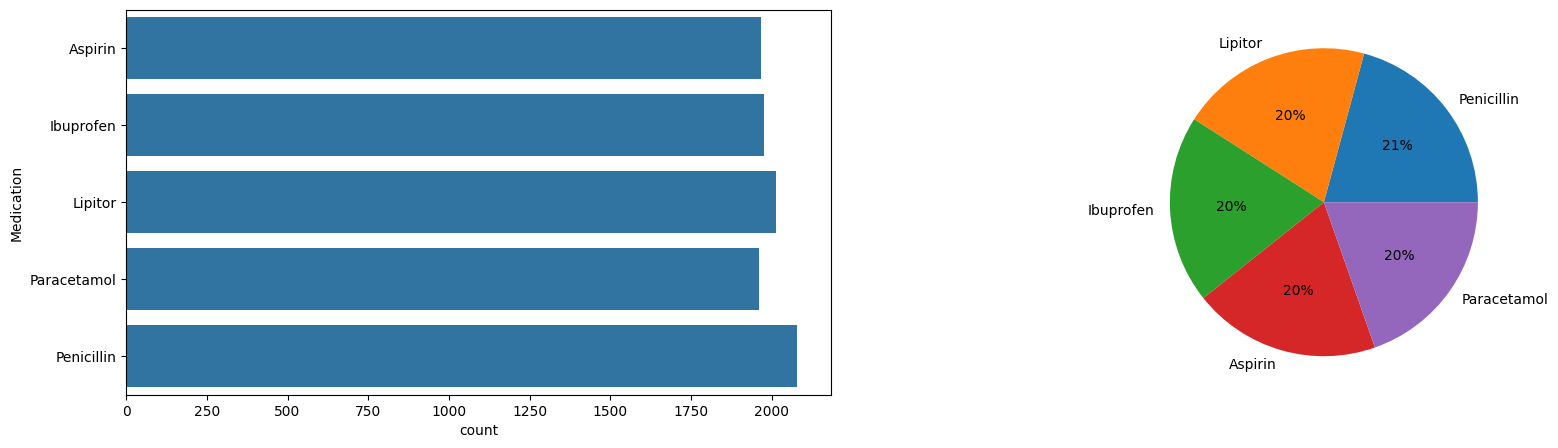

In [25]:
fig,ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(eda_df['Medication'],ax=ax[0])
value,label = eda_df['Medication'].value_counts().values,eda_df['Medication'].value_counts().index

ax[1].pie(value, labels=label, autopct='%.0f%%')

plt.show()

In [26]:
eda_df \
.groupby(['Test Results', 'Medication']) \
.agg({'Medication': 'count'}) \
.rename(columns={'Medication':'count'}) \
.reset_index() \
.sort_values(['Test Results','count'],ascending=[True,False]) \
.style.background_gradient(cmap ='coolwarm', axis=0)

,Test Results,Medication,count
2,Abnormal,Lipitor,721
4,Abnormal,Penicillin,716
3,Abnormal,Paracetamol,685
1,Abnormal,Ibuprofen,680
0,Abnormal,Aspirin,654
7,Inconclusive,Lipitor,685
9,Inconclusive,Penicillin,680
8,Inconclusive,Paracetamol,651
5,Inconclusive,Aspirin,634
6,Inconclusive,Ibuprofen,627


In [150]:
ShowCategoricalAssociations('Medication')

cramers_v : 0.026547279729571802
P value : 0.2745130920292369




**Medication Feature Observations**

  ***Can we draw conclusion from Medication column?***

  - Medication columns is balanced within its category
  - When we compare the Medication feature with Target column (Test Results)we found the following.
    - When Result was Abnormal Medication of Lipitor, Penicillin, Paracetamol Patients have the highest count
    - When Result was Inconclusive Medication of Lipitor, Penicillin, Paracetamol Patients have the highest count
    - When Result was Normal Medication of Penicillin, Aspirin, Ibuprofen Patients have the highest count

In [27]:
eda_df \
.groupby(['Test Results','Medical Condition','Gender']) \
.agg({'Medication': 'count'}) \
.rename(columns={'Medication':'count'}) \
.reset_index() \
.sort_values(['Test Results','Gender','count',],ascending=[True,True,False]) \
.style.background_gradient(cmap ='coolwarm', axis=0)

,Test Results,Medical Condition,Gender,count
2,Abnormal,Asthma,Female,320
4,Abnormal,Cancer,Female,300
10,Abnormal,Obesity,Female,281
0,Abnormal,Arthritis,Female,273
8,Abnormal,Hypertension,Female,272
6,Abnormal,Diabetes,Female,270
9,Abnormal,Hypertension,Male,330
3,Abnormal,Asthma,Male,303
1,Abnormal,Arthritis,Male,282
11,Abnormal,Obesity,Male,281




**Medical Condition and	Gender Feature Observations**

  ***When we compare the observations in terms of Test Results, Medical Conditions and Gender to answer the question as per Gender and Test Results which Medical Conditions are the top occuring?***  

|                      | Female             | Male                |
|----------------------|--------------------|---------------------|
| Abnormal             | Asthma, Cancer, Obesity | Hypertension, Asthma, Arthritis |
| Inconclusive         | Hypertension, Cancer, Asthma | Arthritis, Diabetes, Cancer |
| Normal               | Cancer, Obesity, Diabetes | Cancer, Hypertension, Arthritis |


In [89]:
eda_df \
.groupby(['Test Results', 'Medication','Medical Condition','Gender']) \
.agg({'Medication': 'count'}) \
.rename(columns={'Medication':'count'}) \
.reset_index() \
.sort_values(['Test Results','Gender','count',],ascending=[True,True,False]) \
.style.background_gradient(cmap ='coolwarm', axis=0)
# .query("`Medication` == 'Lipitor' and `Test Results` == 'Abnormal'") \

,Test Results,Medication,Medical Condition,Gender,count
2,Abnormal,Aspirin,Asthma,Female,74
32,Abnormal,Lipitor,Hypertension,Female,68
30,Abnormal,Lipitor,Diabetes,Female,66
16,Abnormal,Ibuprofen,Cancer,Female,65
26,Abnormal,Lipitor,Asthma,Female,64
38,Abnormal,Paracetamol,Asthma,Female,64
40,Abnormal,Paracetamol,Cancer,Female,64
22,Abnormal,Ibuprofen,Obesity,Female,62
36,Abnormal,Paracetamol,Arthritis,Female,62
52,Abnormal,Penicillin,Cancer,Female,62


# Feature Engineering

In [30]:
eda_df = eda_df.assign(
    Admitted=(eda_df['Discharge Date'] - eda_df['Date of Admission']).dt.days,
)

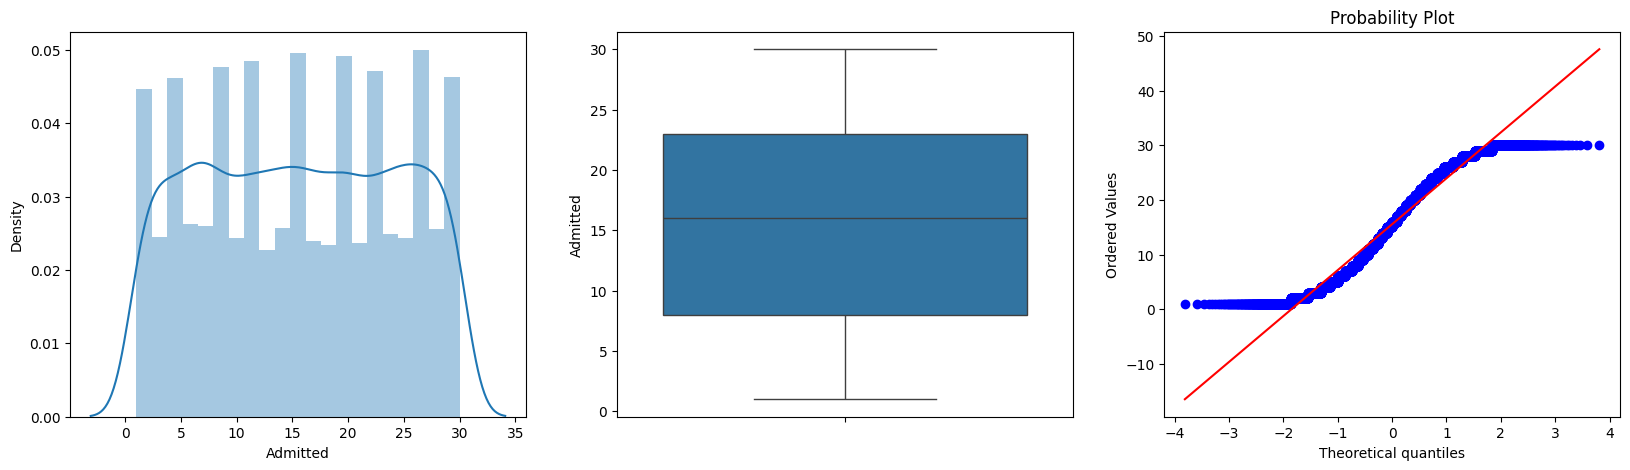

In [31]:
fig,ax = plt.subplots(1,3,figsize=(20,5))

sns.distplot(eda_df['Admitted'],ax=ax[0])
sns.boxplot(eda_df['Admitted'],ax=ax[1])
stats.probplot(eda_df['Admitted'],plot=ax[2])

plt.show()

In [32]:
eda_df \
.groupby(['Test Results']) \
.agg({'Admitted':['mean','median','max','min','std','var','count']}) \
.reset_index() \
.style.background_gradient(cmap ='coolwarm')

In [90]:
Admitted_Medical_cond = eda_df \
.groupby(['Test Results','Medical Condition','Admitted'],as_index=False) \
.agg({'Admitted': ['mean','median']})


Admitted_Medical_cond.columns = Admitted_Medical_cond.columns.droplevel()

Admitted_Medical_cond.columns = ['Test Results','Medical Condition','Admitted_mean','Admitted_median']

Admitted_Medical_cond \
.query("`Test Results` == 'Abnormal'") \
.sort_values('Admitted_median',ascending=False).iloc[:10,:]

,Test Results,Medical Condition,Admitted_mean,Admitted_median
179,Abnormal,Obesity,30.0,30.0
119,Abnormal,Diabetes,30.0,30.0
29,Abnormal,Arthritis,30.0,30.0
59,Abnormal,Asthma,30.0,30.0
89,Abnormal,Cancer,30.0,30.0
149,Abnormal,Hypertension,30.0,30.0
118,Abnormal,Diabetes,29.0,29.0
88,Abnormal,Cancer,29.0,29.0
148,Abnormal,Hypertension,29.0,29.0
58,Abnormal,Asthma,29.0,29.0


In [95]:
features_df = eda_df.drop(['Date of Admission','Discharge Date'],axis=1)

In [96]:
features_df.sample(5)

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Admitted
1931,45,Male,B-,Cancer,Blue Cross,9350.316428,Urgent,Penicillin,Inconclusive,24
437,55,Male,AB-,Diabetes,Blue Cross,24371.732447,Emergency,Paracetamol,Normal,8
364,53,Male,AB-,Asthma,UnitedHealthcare,43495.230345,Urgent,Aspirin,Abnormal,22
4178,66,Male,A-,Arthritis,Medicare,20925.313983,Urgent,Aspirin,Normal,15
3570,36,Male,O+,Hypertension,Aetna,31172.573142,Elective,Penicillin,Abnormal,7


In [98]:
X,y = features_df.drop(['Test Results'],axis=1),features_df['Test Results']

X_train, X_other, y_train, y_other = train_test_split(X,y,test_size=0.3,random_state=101,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,test_size=0.3,random_state=101,stratify=y_other)

In [102]:
print(f'Training Data Shape : {X_train.shape}\nValidation Data Shape : {X_val.shape}\nTesting Data Shape :{X_test.shape}')

Training Data Shape : (7000, 9)
Validation Data Shape : (2100, 9)
Testing Data Shape :(900, 9)


In [152]:
X_train_experiment = X_train.assign(
    Gender_BloodType = X_train['Gender'] + '-' + X_train['Blood Type']
)

In [154]:
def ShowCategoricalAssocia(feature=None):
  contingency_table = pd.crosstab(y_train,X_train_experiment[feature])

  chi_stats, pvalue = chi2_contingency(contingency_table)[0],chi2_contingency(contingency_table)[1]
  num_obs = contingency_table.sum().sum()
  cramers_v = np.sqrt(chi_stats / (num_obs * (min(contingency_table.shape) - 1)))
  print(f'cramers_v : {cramers_v}\nP value : {pvalue}')

ShowCategoricalAssocia('Gender_BloodType')

cramers_v : 0.04912283271689287
P value : 0.28960187683872207
